In [1]:
#Imports
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pandas as pd
import numpy as np
import cv2
import gc

import matplotlib.pyplot as plt

In [2]:
base_dir = '../data'

img_size = 128

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

# from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10, shuffle=True)
# label_binarizer = LabelBinarizer()
# y_train = label_binarizer.fit_transform(y_train)
# y_test = label_binarizer.fit_transform(y_test)

# print(y_test.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(x_train.shape)

Found 69600 images belonging to 29 classes.
Found 13050 images belonging to 29 classes.


In [6]:
model = Sequential()
model.add(Conv2D(256, (2,2), input_shape=(img_size,img_size,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (2,2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(258, activation = 'relu'))
model.add(Dense(29, activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 127, 127, 256)     3328      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 256)       262400    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 128)       131200    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)       

In [7]:
history = model.fit(
train_generator,
epochs = 10,
steps_per_epoch = 696,
validation_data = validation_generator,
validation_steps = 130)

Epoch 1/10
696/696 [==============================] - 35s 50ms/step - loss: 2.8267 - accuracy: 0.1858 - val_loss: 1.2838 - val_accuracy: 0.6319
Epoch 2/10
696/696 [==============================] - 35s 50ms/step - loss: 0.6438 - accuracy: 0.7979 - val_loss: 1.0727 - val_accuracy: 0.7158
Epoch 3/10
696/696 [==============================] - 35s 50ms/step - loss: 0.3115 - accuracy: 0.8942 - val_loss: 1.1266 - val_accuracy: 0.7808
Epoch 4/10
696/696 [==============================] - 35s 50ms/step - loss: 0.2002 - accuracy: 0.9313 - val_loss: 1.1626 - val_accuracy: 0.7950
Epoch 5/10
696/696 [==============================] - 34s 49ms/step - loss: 0.1372 - accuracy: 0.9538 - val_loss: 1.0943 - val_accuracy: 0.7765
Epoch 6/10
696/696 [==============================] - 36s 52ms/step - loss: 0.1035 - accuracy: 0.9656 - val_loss: 1.3082 - val_accuracy: 0.7754
Epoch 7/10
696/696 [==============================] - 37s 53ms/step - loss: 0.1084 - accuracy: 0.9648 - val_loss: 1.2597 - val_accuracy:

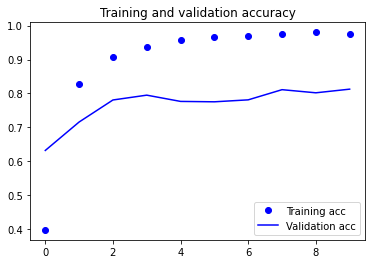

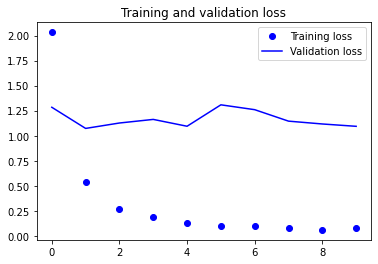

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.save('testModel.h5')

In [45]:
dire = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
dire.insert(4, 'del')
dire.insert(19, 'space')
dire.insert(14, 'nothing')
def prediction(model, array, items_l):
    prob = model.predict(array.reshape(1, img_size, img_size,3 ))
    pro_df = pd.DataFrame(prob, columns = items_l)
    cv2.imshow('test', array)
    if np.argmax(prob) > 0.9:
        result = items_l[np.argmax(prob)]
    else:
        result = ''
    return pro_df, result

from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import cv2
img_array = image_process('a.jpg')
pro_df, result = prediction(model, img_array, dire)
result

'O'